In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('Blood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   748 non-null    int64
 1   F1      748 non-null    int64
 2   F2      748 non-null    int64
 3   F3      748 non-null    int64
 4   F4      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
# df.class.value_counts()
df['class'].value_counts()

0    570
1    178
Name: class, dtype: int64

In [12]:
from sklearn.utils import resample

df_one = df[df['class'] == 1]
df_zero = df[df['class'] == 0]

df_minority_upsampled = resample(df_one,
                                 replace=True,
                                 n_samples=300)

In [15]:
new_df=pd.concat([df_zero,df_minority_upsampled])

In [16]:
new_df['class'].value_counts()

0    570
1    300
Name: class, dtype: int64

In [18]:
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [19]:
X_features = list( new_df.columns )
X_features.remove('class')
X_features

['F1', 'F2', 'F3', 'F4']

In [20]:
encoded_df = pd.get_dummies( new_df[X_features],drop_first = True )
X = encoded_df

In [21]:
Y=new_df['class']

In [22]:
train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size=0.3, random_state=42)

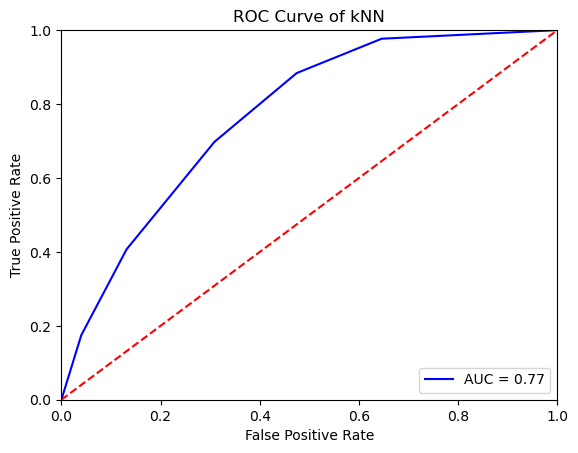

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
## Initializing the classifier
knn_clf = KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit( train_x, train_y )
#invoking draw_roc_curve with the knn model
y_scores = knn_clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [33]:
pred_y = knn_clf.predict(test_x)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       175
           1       0.53      0.70      0.60        86

    accuracy                           0.69       261
   macro avg       0.67      0.69      0.68       261
weighted avg       0.73      0.69      0.70       261



In [54]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors': range(5,10),
                     'metric': ['canberra', 'euclidean',
                     'minkowski']}]
## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=10,
                   scoring='roc_auc')
## fit the search with training set
clf.fit(train_x, train_y)
print(clf.best_score_)
print(clf.best_params_)

0.7659537684537685
{'metric': 'canberra', 'n_neighbors': 6}


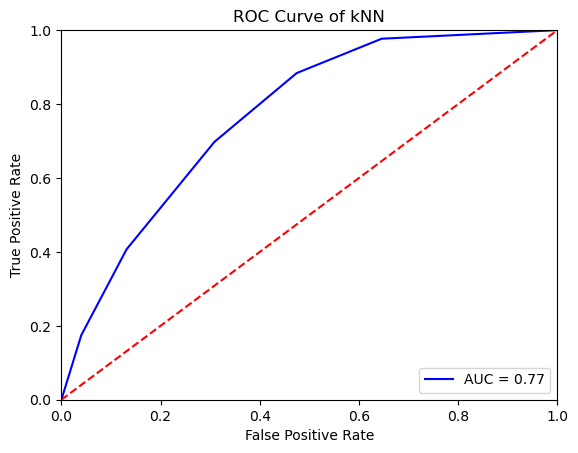

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       175
           1       0.62      0.59      0.61        86

    accuracy                           0.75       261
   macro avg       0.71      0.71      0.71       261
weighted avg       0.74      0.75      0.75       261



In [59]:
knn_clf_optimal = KNeighborsClassifier(n_neighbors=6,metric='canberra')
knn_clf_optimal.fit( train_x, train_y )
y_scores = knn_clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()
pred_y = knn_clf_optimal.predict(test_x)
print(classification_report(test_y, pred_y))

In [42]:
from sklearn.ensemble import RandomForestClassifier
## Initializing the Random Forest Classifier with max_dept and
## n_estimators
radm_clf = RandomForestClassifier(max_depth=10, n_estimators=10)
radm_clf.fit( train_x, train_y )

RandomForestClassifier(max_depth=10, n_estimators=10)

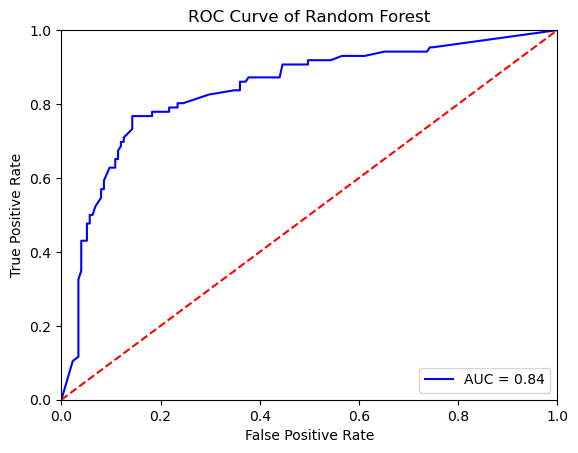

In [44]:
y_scores_radm = radm_clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, y_scores_radm[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

In [64]:
tuned_parameters = [{'max_depth': [10, 15],
                     'n_estimators': [10,20],
                     'max_features': ['sqrt', 0.2]}]
## Initializing the RF classifier
radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                   tuned_parameters,
                   cv=5,
                   scoring='roc_auc')
## Fitting the training set
clf.fit(train_x, train_y)
print(clf.best_score_)
print(clf.best_params_)

0.8313196517935995
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}


In [66]:
pred_y = clf.predict(test_x)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       175
           1       0.69      0.71      0.70        86

    accuracy                           0.80       261
   macro avg       0.77      0.77      0.77       261
weighted avg       0.80      0.80      0.80       261



In [61]:
radm_clf_optimal = RandomForestClassifier(max_depth=10,
                                 n_estimators=10,
                                 max_features = 0.2)
## Fitting the model with the training set
radm_clf_optimal.fit( train_x, train_y )

RandomForestClassifier(max_depth=10, max_features=0.2, n_estimators=10)

In [67]:
pred_y = radm_clf_optimal.predict(test_x)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       175
           1       0.69      0.76      0.72        86

    accuracy                           0.81       261
   macro avg       0.78      0.80      0.79       261
weighted avg       0.81      0.81      0.81       261



In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=50)
ada_clf.fit(train_x, train_y)

AdaBoostClassifier()

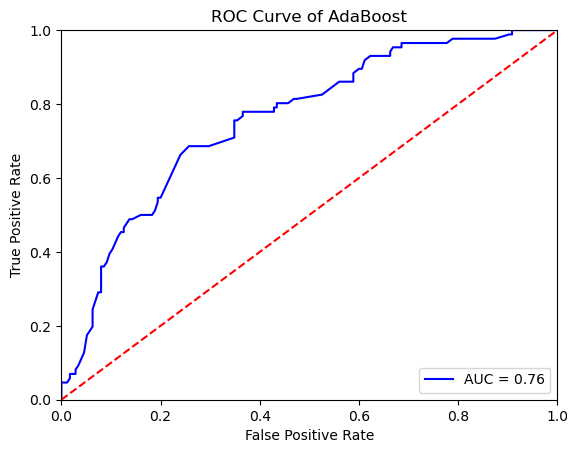

In [49]:
y_scores_ada = ada_clf.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, y_scores_ada[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of AdaBoost')
plt.show()

In [68]:
pred_y = ada_clf.predict(test_x)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       175
           1       0.60      0.50      0.54        86

    accuracy                           0.72       261
   macro avg       0.68      0.67      0.67       261
weighted avg       0.71      0.72      0.72       261



In [104]:
#Using Logistic Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

abc = AdaBoostClassifier(estimator=LogisticRegression())

parameters = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(train_x,train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [105]:
print(clf.best_score_)
print(clf.best_params_)

0.49456314156123177
{'learning_rate': 0.01, 'n_estimators': 10}


In [106]:
pred_y = clf.predict(test_x)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       175
           1       0.61      0.44      0.51        86

    accuracy                           0.72       261
   macro avg       0.69      0.65      0.66       261
weighted avg       0.71      0.72      0.71       261



In [107]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

abc = AdaBoostClassifier(estimator=DecisionTreeClassifier())

parameters = {'estimator__max_depth':[i for i in range(2,11,2)],
              'estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 4, 6, 8, 10],
                         'estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [108]:
print(clf.best_score_)
print(clf.best_params_)

0.7057822955404849
{'estimator__max_depth': 8, 'estimator__min_samples_leaf': 5, 'learning_rate': 0.01, 'n_estimators': 250}


In [109]:
pred_y = clf.predict(test_x)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       175
           1       0.72      0.73      0.72        86

    accuracy                           0.82       261
   macro avg       0.79      0.79      0.79       261
weighted avg       0.82      0.82      0.82       261

